# Week 4

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import janitor
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,6)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Optional: For higher quality plots

alt.renderers.enable('default')
alt.renderers.set_embed_options(width=1000)

RendererRegistry.enable('default')

In [51]:
dat = pd.read_csv("data/A2_TrainSet.csv", sep=";").clean_names()

##  Exercise A. 

The first series of the dataset presents the monthly totals of international airline
passengers between 1949 and 1960, measured in thousands. You are asked:
- To seasonally adjust the series and compute its seasonal indexes. To do so, you should use both the additive and multiplicative expression of the decomposition method and select the most appropriate one.
- To generate forecasts for the following year using Simple, Holt and Damped Exponential Smoothing.
- To select the most appropriate forecasting method of the alternatives considered above using an in-sample accuracy measure of your choice.
- To provide the 80% and 95% prediction intervals for the following year using the forecasting method you have selected above.

In [74]:
ap_dat = dat.dropna().filter(["airpassengers"])
ap_dat["unique_id"] = 1
ap_dat['ds'] = pd.date_range("01-1949","12-1959", freq="MS")
ap_dat = ap_dat.sort_values('ds')
ap_dat

,airpassengers,unique_id,ds
0,112.0,1,1949-01-01
1,118.0,1,1949-02-01
2,132.0,1,1949-03-01
3,129.0,1,1949-04-01
4,121.0,1,1949-05-01
...,...,...,...
127,559.0,1,1959-08-01
128,463.0,1,1959-09-01
129,407.0,1,1959-10-01
130,362.0,1,1959-11-01


<AxesSubplot: >

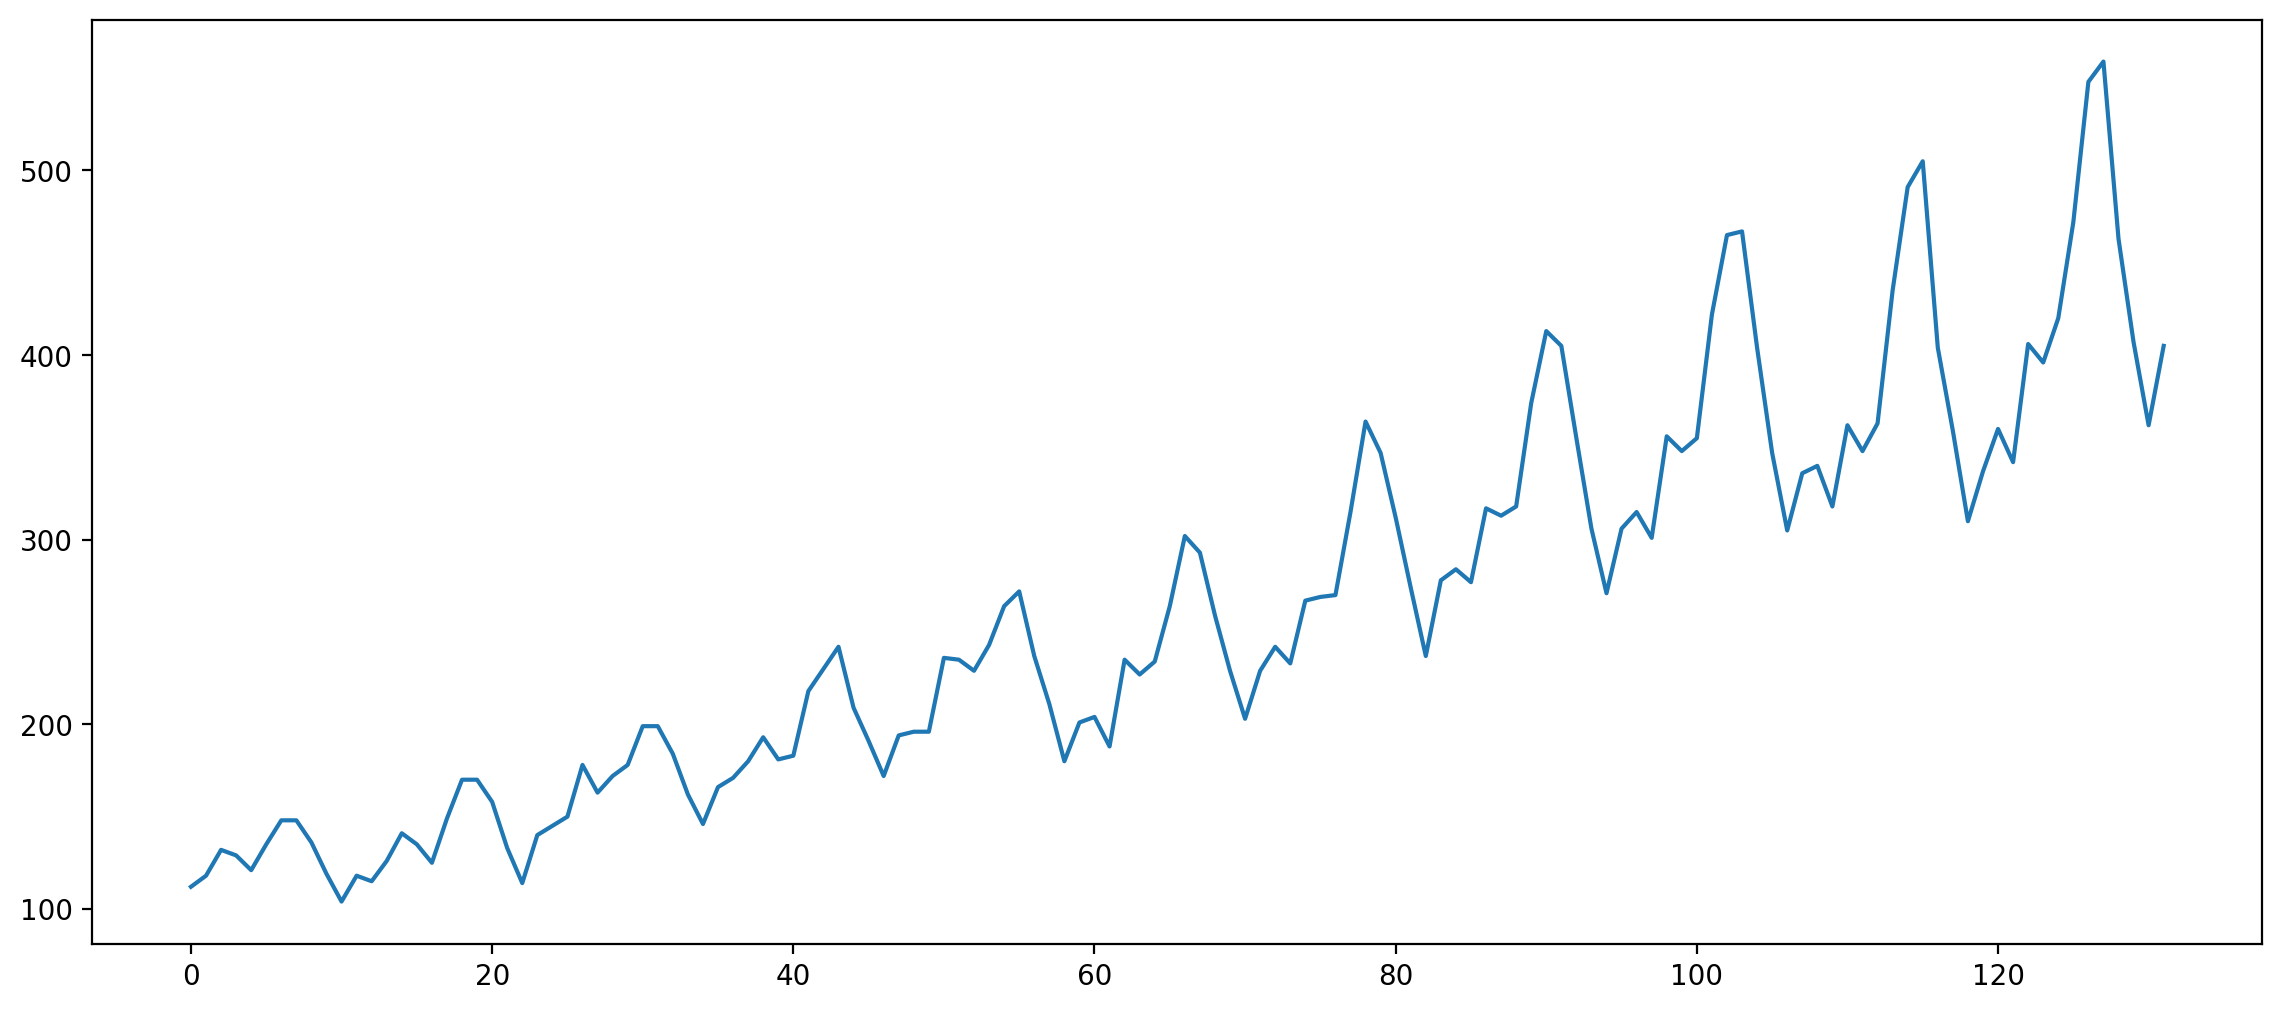

In [76]:
ap_dat.airpassengers.plot()

### Decomposition

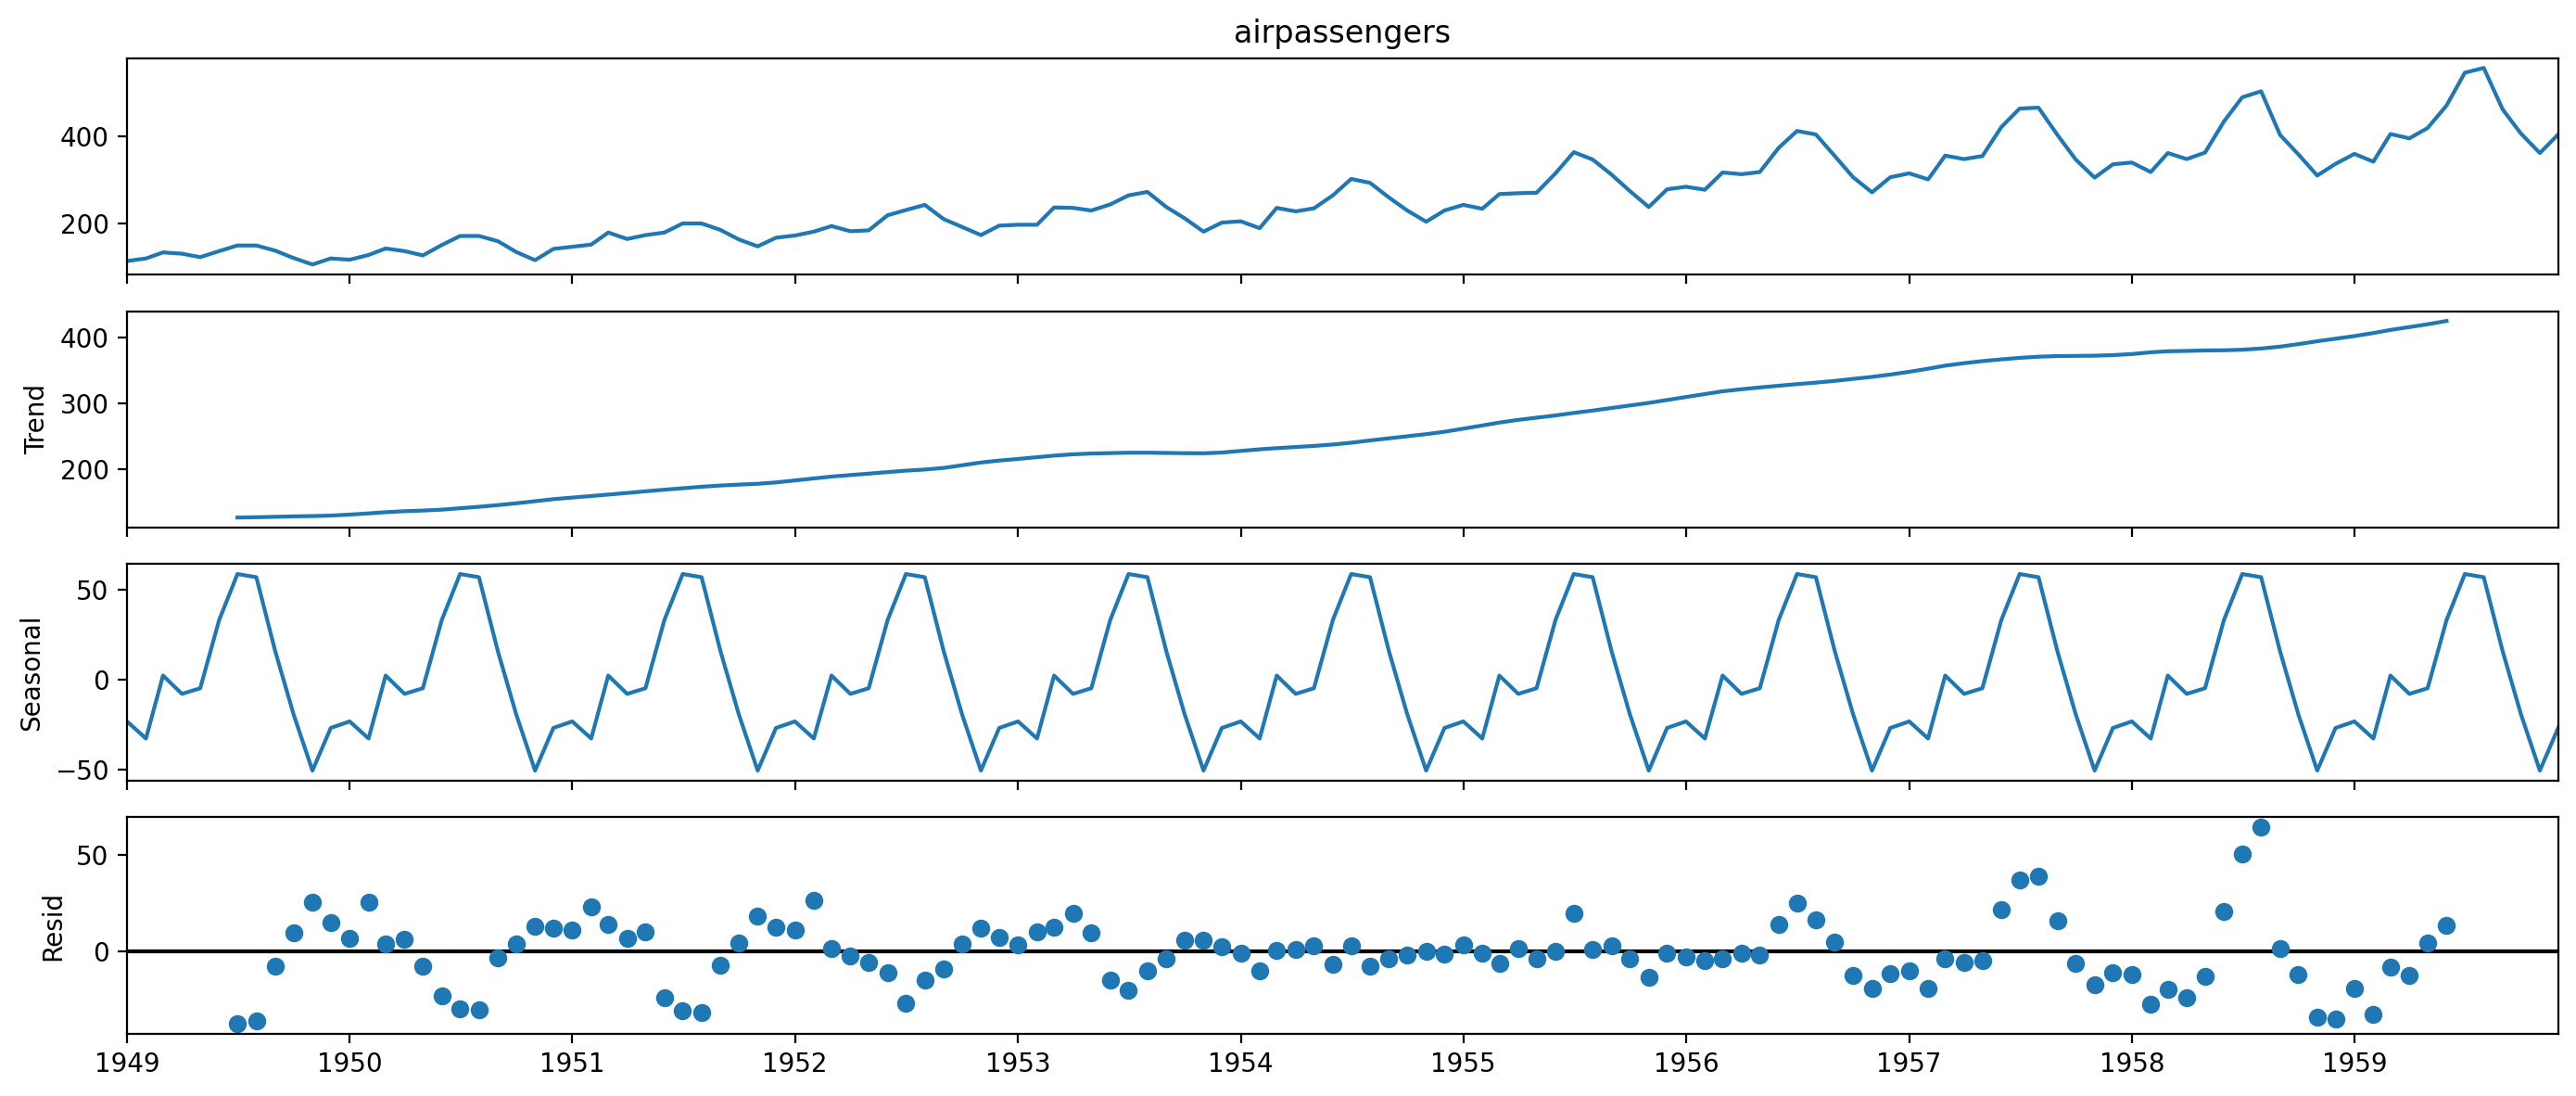

In [80]:
additive_decompose = seasonal_decompose(ap_dat.set_index('ds').airpassengers)
additive_decompose.plot();

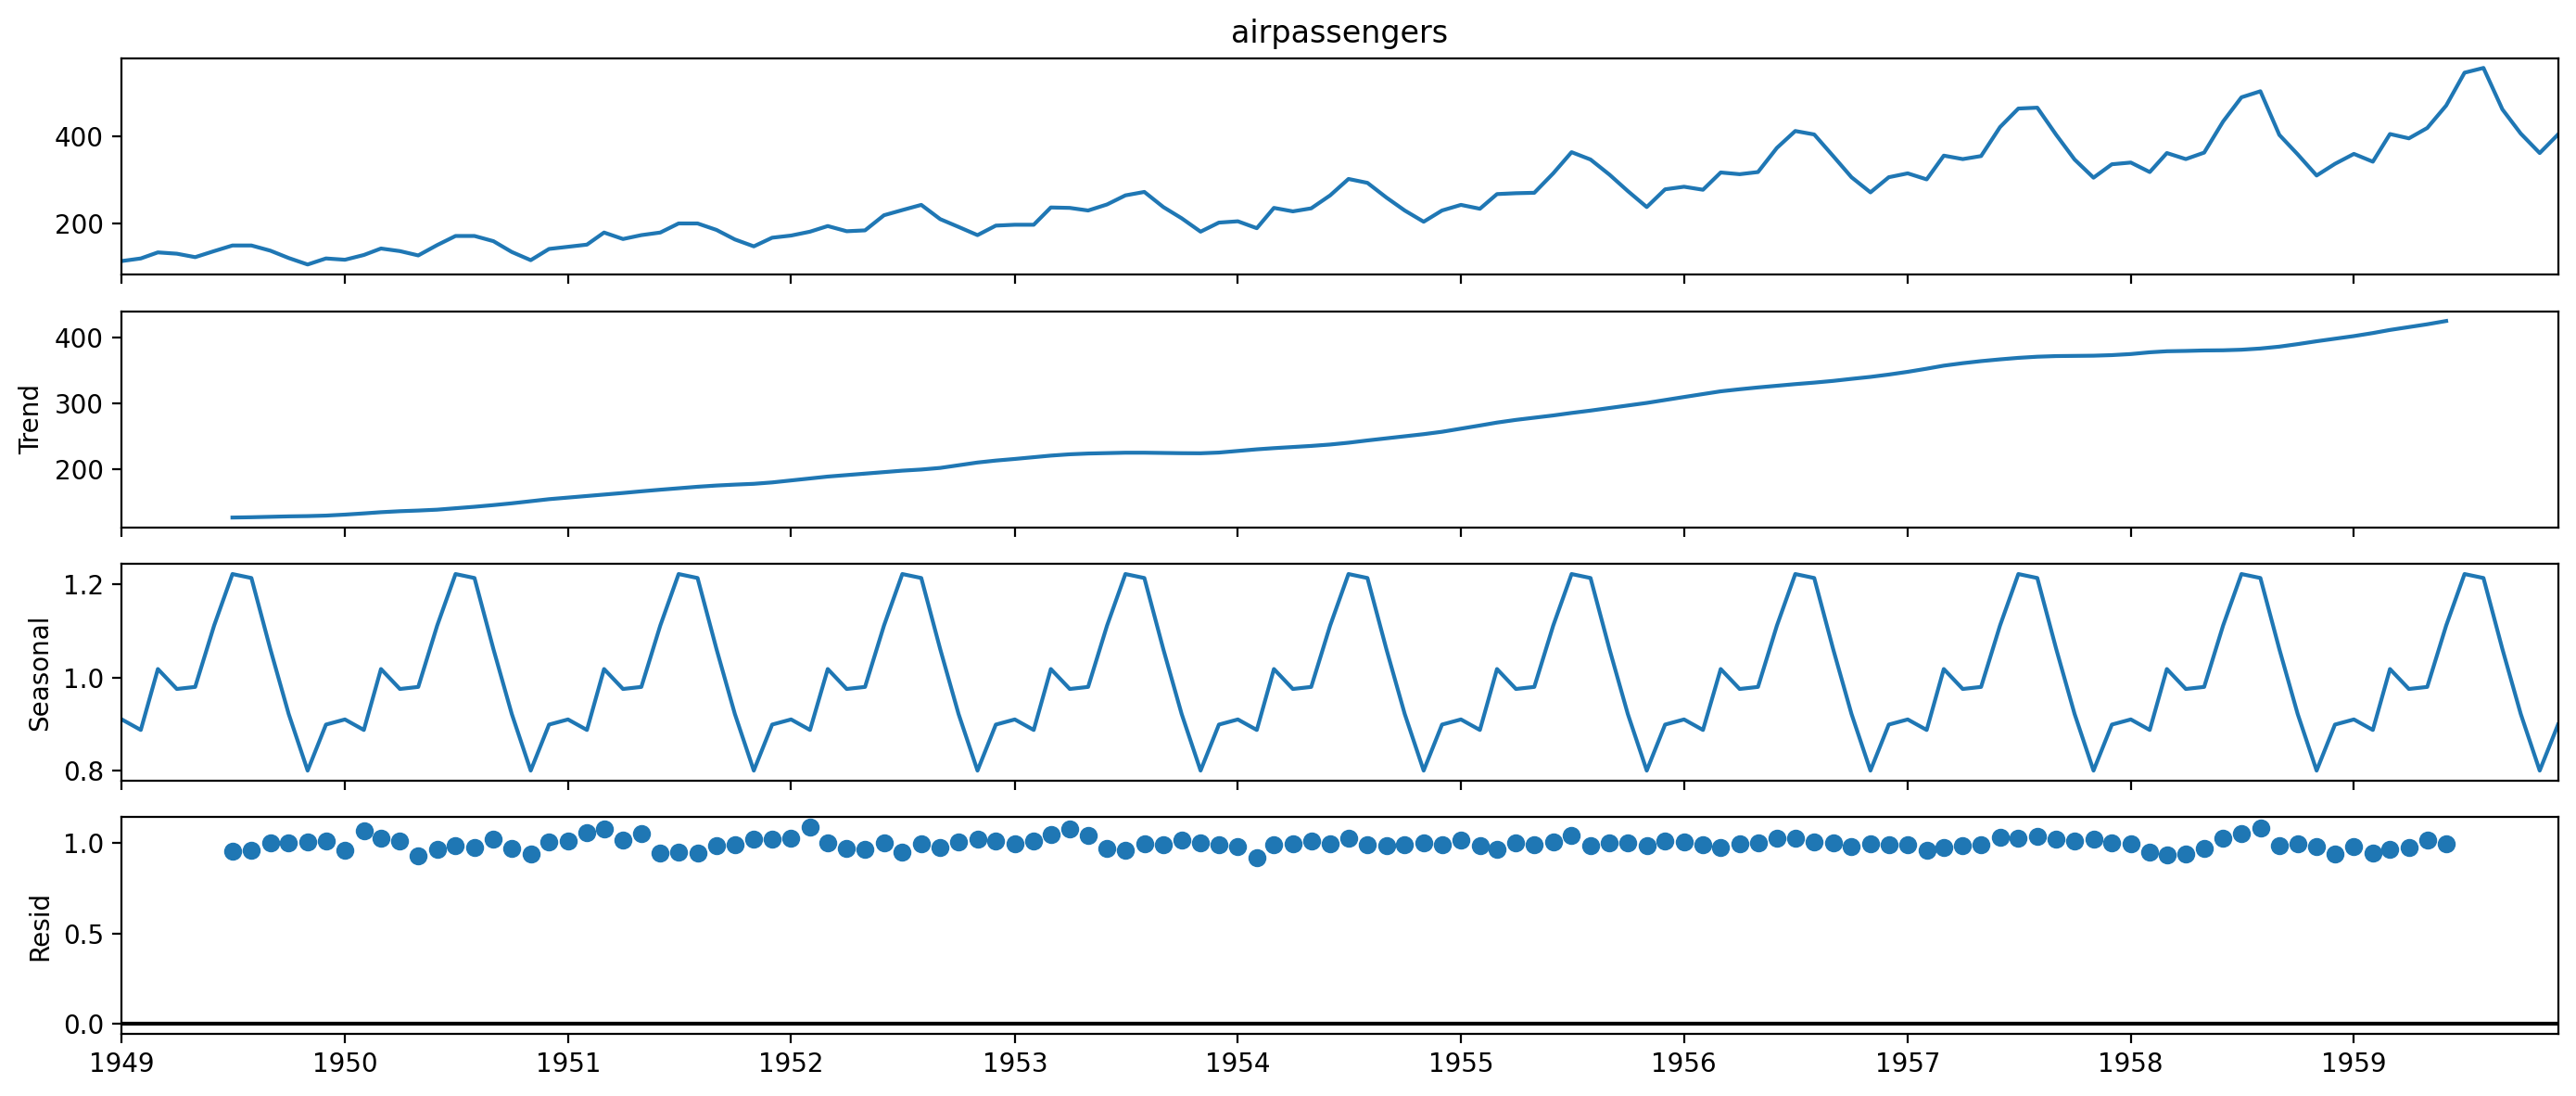

In [81]:
multiplicative_decompose = seasonal_decompose(ap_dat.set_index('ds').airpassengers, model = "m")
multiplicative_decompose.plot();

### Stats Forecasts

Simple, Holt and Damped Exponential Smoothing

In [129]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, Naive, SeasonalNaive, Holt, HoltWinters, SimpleExponentialSmoothing, SeasonalExponentialSmoothing
import matplotlib

In [131]:
sf = StatsForecast(
    models = [
        Naive(), 
        SimpleExponentialSmoothing(alpha=0.1), 
        HoltWinters(12), 
        Holt(12), 
        SeasonalNaive(12)
        # SeasonalExponentialSmoothing(0.1, 12)
        ],
    freq = 'M'
)

sf.fit(ap_dat)
forecast_df = sf.predict(h=12, level=[95])


sf.plot(ap_dat, forecast_df, level=[95])

<AxesSubplot: xlabel='date'>

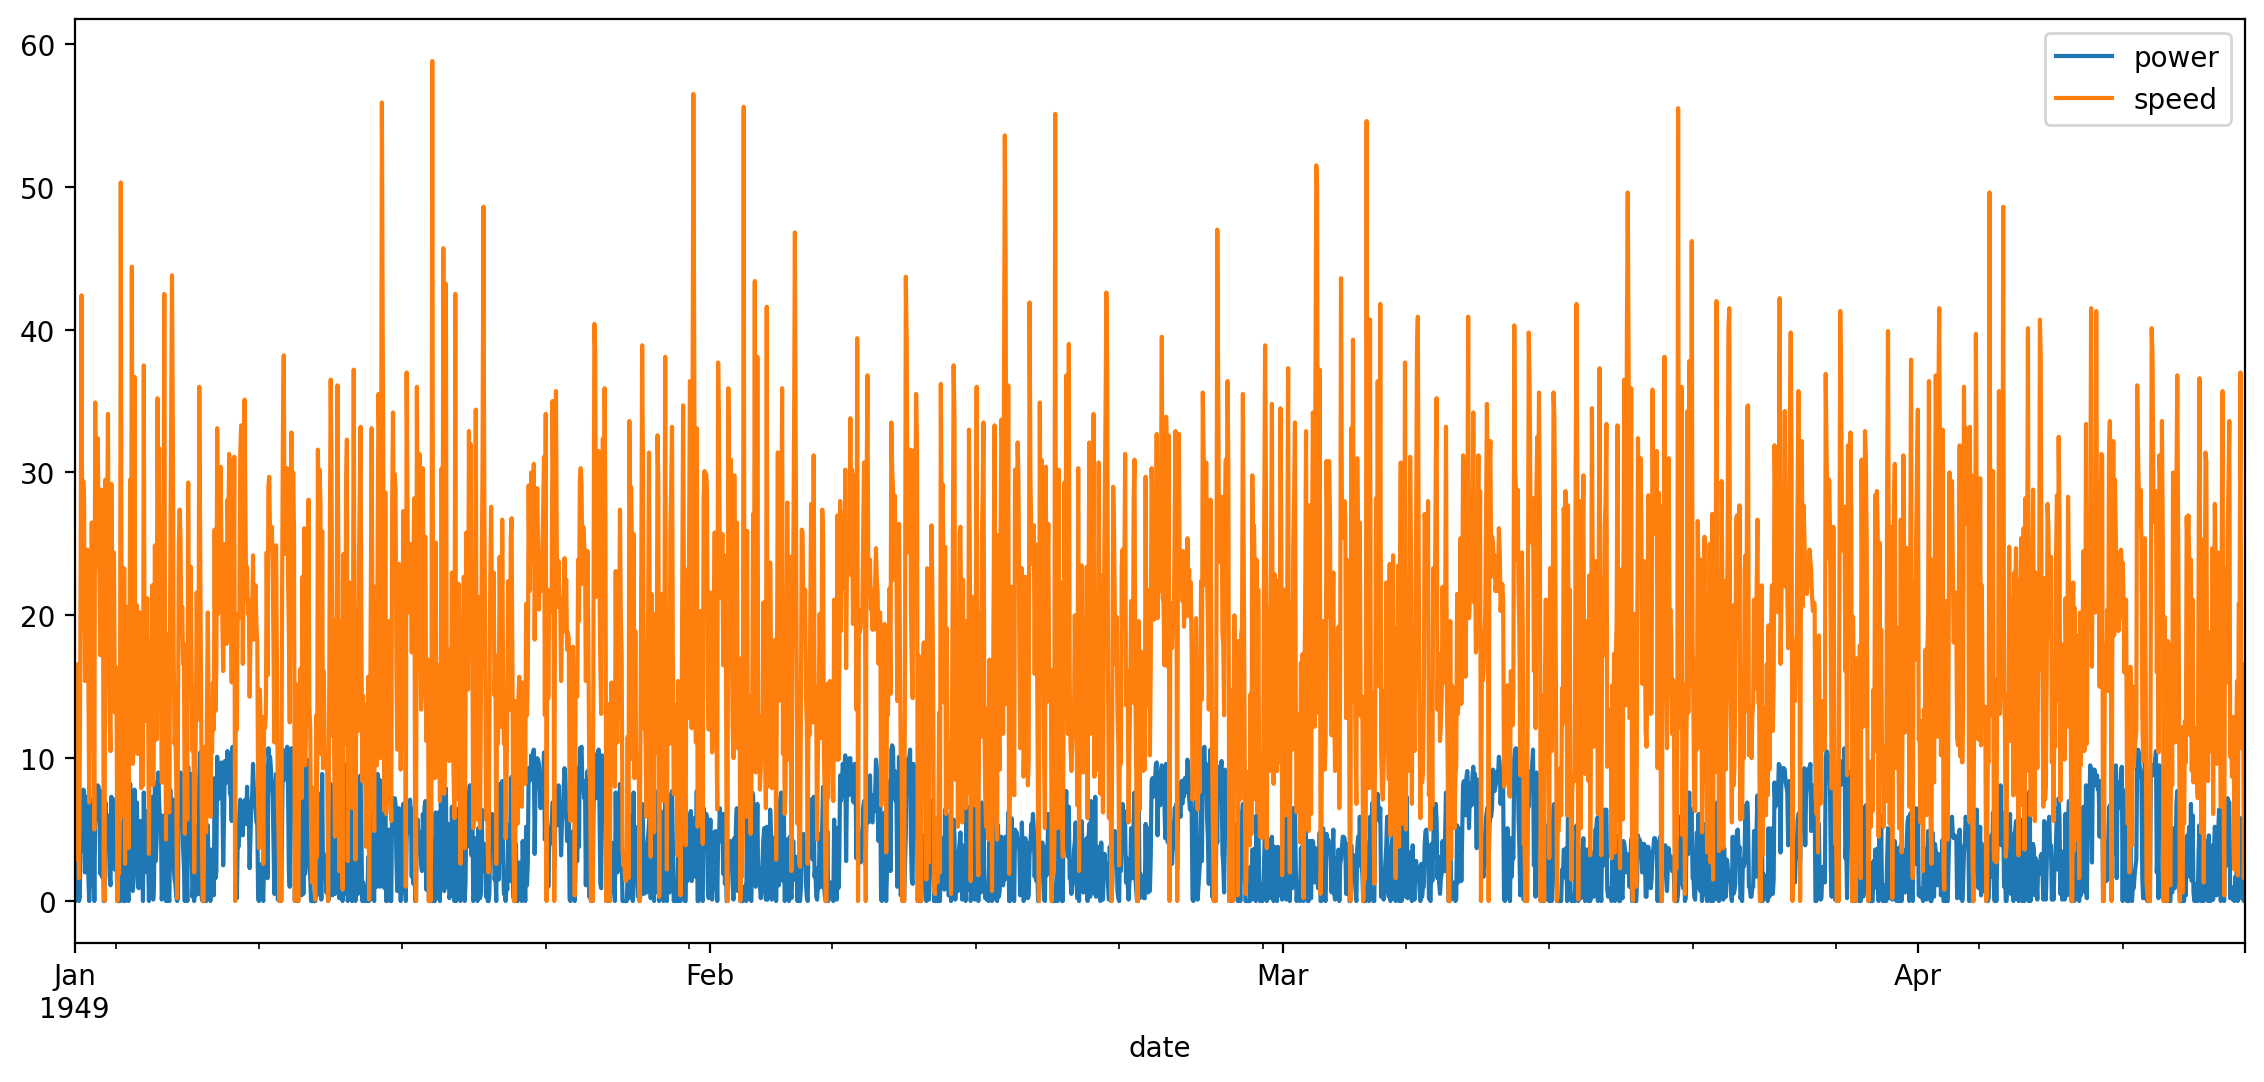

In [47]:
hr_dat = dat.filter(["power","speed"])
hr_dat['date'] = pd.date_range("01-1949","1-1960", freq="H")[:hr_dat.shape[0]]
hr_dat.set_index('date', inplace=True)
hr_dat.plot()

In [46]:
pd.date_range("01-1949","1-1960", freq="H")[:hr_dat.shape[0]]

DatetimeIndex(['1949-01-01 00:00:00', '1949-01-01 01:00:00',
               '1949-01-01 02:00:00', '1949-01-01 03:00:00',
               '1949-01-01 04:00:00', '1949-01-01 05:00:00',
               '1949-01-01 06:00:00', '1949-01-01 07:00:00',
               '1949-01-01 08:00:00', '1949-01-01 09:00:00',
               ...
               '1949-04-16 14:00:00', '1949-04-16 15:00:00',
               '1949-04-16 16:00:00', '1949-04-16 17:00:00',
               '1949-04-16 18:00:00', '1949-04-16 19:00:00',
               '1949-04-16 20:00:00', '1949-04-16 21:00:00',
               '1949-04-16 22:00:00', '1949-04-16 23:00:00'],
              dtype='datetime64[ns]', length=2544, freq='H')

In [48]:
pd.date_range("01-1949","01-1960", freq="H")

DatetimeIndex(['1949-01-01 00:00:00', '1949-01-01 01:00:00',
               '1949-01-01 02:00:00', '1949-01-01 03:00:00',
               '1949-01-01 04:00:00', '1949-01-01 05:00:00',
               '1949-01-01 06:00:00', '1949-01-01 07:00:00',
               '1949-01-01 08:00:00', '1949-01-01 09:00:00',
               ...
               '1959-12-31 15:00:00', '1959-12-31 16:00:00',
               '1959-12-31 17:00:00', '1959-12-31 18:00:00',
               '1959-12-31 19:00:00', '1959-12-31 20:00:00',
               '1959-12-31 21:00:00', '1959-12-31 22:00:00',
               '1959-12-31 23:00:00', '1960-01-01 00:00:00'],
              dtype='datetime64[ns]', length=96409, freq='H')

In [49]:
hr_dat

,power,speed
date,,
1949-01-01 00:00:00,0.0,2.9
1949-01-01 01:00:00,0.0,7.6
1949-01-01 02:00:00,1.4,14.5
1949-01-01 03:00:00,2.9,16.4
1949-01-01 04:00:00,3.0,16.6
...,...,...
1949-04-16 19:00:00,0.2,10.7
1949-04-16 20:00:00,2.9,16.4
1949-04-16 21:00:00,3.0,16.6
